
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,195.29,40.58,-6.49,10.49,10.00,16.52,7.67,20.42,-6.49,-132.53
1,DIA,DJIA ETF,US Stocks:Large Cap,40.39,20.77,-1.92,8.31,7.58,14.09,8.00,20.00,-1.92,-38.40
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,618.56,66.41,-14.09,12.58,13.75,23.96,9.59,24.56,-14.09,-346.05
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,224.04,41.65,-6.61,10.09,9.62,16.91,7.94,21.02,-6.61,-138.94
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,400.97,38.73,-1.07,8.27,6.20,18.89,8.12,25.85,-1.07,-27.66
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,324.21,57.25,3.93,11.71,8.30,17.56,7.04,24.10,3.93,0.16
6,IWD,Russell 1000 Value ETF,US Stocks:Value,114.59,37.78,-0.06,8.67,7.02,14.36,7.20,20.50,-0.06,-1.23
7,IWF,Russell 1000 Growth ETF,US Stocks,369.61,46.32,-13.28,10.76,11.92,20.25,8.87,23.52,-13.28,-312.35
8,RSP,S&P 500 Equal Weight ETF,US Stocks,207.31,53.01,0.61,12.69,9.98,16.29,7.47,22.30,0.61,0.03
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,380.65,47.25,2.22,11.59,8.03,18.60,7.43,25.88,2.22,0.09


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
14,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,27.92,-15.83,31.57,23.89,8.06,24.15,14.12,43.31,31.57,0.73
20,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,-17.77,18.37,4.55,3.31,9.79,16.00,11.47,18.18,4.55,0.25
21,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-19.16,2.43,2.71,11.73,10.48,12.58,8.15,16.08,2.71,0.17
16,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,80.61,47.53,2.99,10.29,7.25,18.57,10.01,23.66,2.99,0.13
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,195.81,75.55,1.34,15.40,8.39,19.39,7.87,23.76,1.34,0.06
18,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,-8.98,9.76,-0.39,8.05,7.84,16.63,10.43,15.05,-0.39,-5.87
15,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,120.67,37.45,-5.49,9.00,6.44,15.19,7.79,24.65,-5.49,-135.33
19,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,326.17,77.14,-7.95,5.54,8.86,23.50,11.60,21.94,-7.95,-174.42
17,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,492.53,63.44,-11.10,15.10,17.21,23.49,10.25,24.62,-11.10,-273.28
22,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,948.25,45.52,-15.34,8.29,8.81,23.28,9.12,27.75,-15.34,-425.69


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLE,XLU,XLV,XLI,XLB,XLP,XLF,XLRE,XLK,XLY,XLC,All S&P500 Sectors Portfolio
Annual Returns,31.57,4.55,2.71,2.99,1.34,-0.39,-5.49,-7.95,-11.10,-15.34,-19.62,-2.99
Std Dev,43.31,18.18,16.08,23.66,23.76,15.05,24.65,21.94,24.62,27.75,24.46,19.91
Sharpe Ratio,0.73,0.25,0.17,0.13,0.06,-5.87,-135.33,-174.42,-273.28,-425.69,-479.91,-59.61
Weight,0.06,0.07,0.11,0.09,0.11,0.08,0.11,0.07,0.08,0.09,0.12,1.00
Worst Typical Down Year,-55.05,-31.81,-29.45,-44.33,-46.18,-30.49,-54.79,-51.83,-60.34,-70.84,-68.54,-42.81
Black Swan,-98.36,-49.99,-45.53,-67.99,-69.94,-45.54,-79.44,-73.77,-84.96,-98.59,-93.00,-62.71


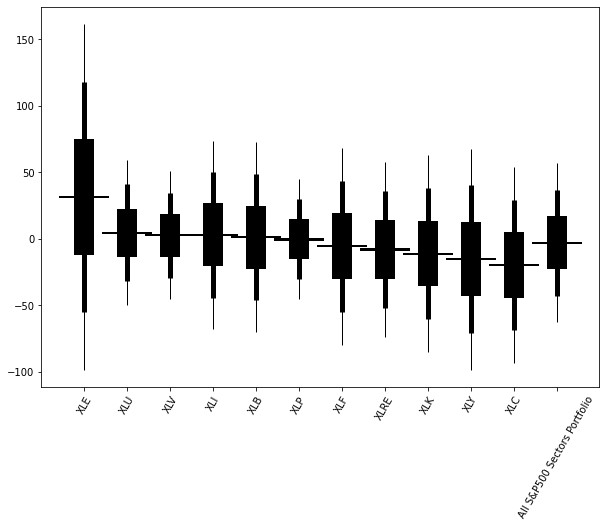

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

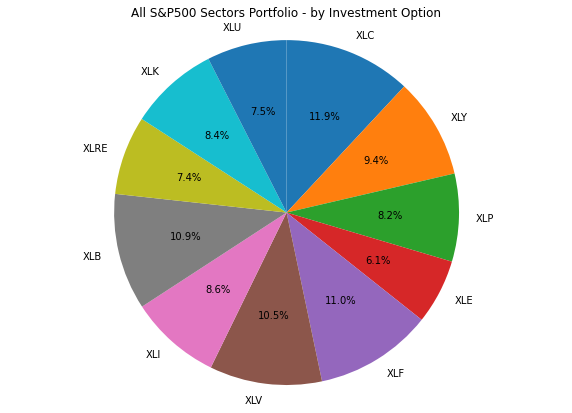

XLC    0.12
XLY    0.09
XLP    0.08
XLE    0.06
XLF    0.11
XLV    0.11
XLI    0.09
XLB    0.11
XLRE   0.07
XLK    0.08
XLU    0.07



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLE                            0.0608
    XLU                            0.0749
    XLV                            0.1054
    XLI                            0.0858
    XLB                            0.1091
    XLP                            0.0823
    XLF                            0.1102
    XLRE                           0.0740
    XLK                            0.0838
    XLY                            0.0942
    XLC                            0.1194


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer

Impossible criteria specified, lower your expectations!!!


### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).